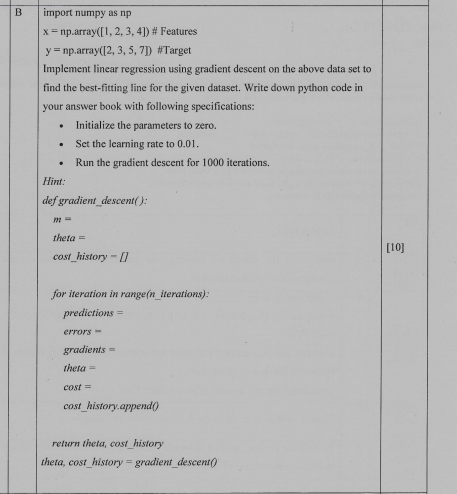


Iterations 0 cost 10.875
Iterations 100 cost 0.05412228141873412
Iterations 200 cost 0.04981862214280977
Iterations 300 cost 0.04662937773321222
Iterations 400 cost 0.0442658165685657
Iterations 500 cost 0.04251417239785649
Iterations 600 cost 0.04121602223924252
Iterations 700 cost 0.04025395821819933
Iterations 800 cost 0.03954096891226726
Iterations 900 cost 0.03901256982524769


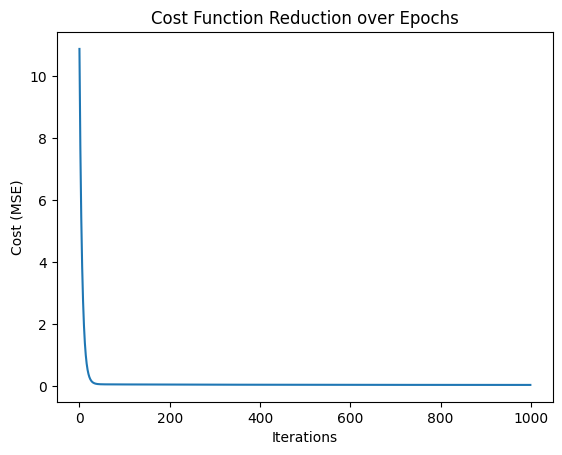

Final w0: 0.11586119372250991
Final w1: 1.660593065245774


In [17]:
#link - https://www.youtube.com/watch?v=BZ10SGWtU-s&list=PLu0W_9lII9ai6fAMHp-acBmJONT7Y4BSG&index=13
#term end question -
# import numpy as np
# x = np.array([1, 2, 3, 4]) # Features
# y = np.array([2, 3, 5, 7]) #Target
# Implement linear regression using gradient descent on the above data set to
# find the best-fitting line for the given dataset. Write down python code in
# your answer book with following specifications:
# e Initialize the parameters to zero.
# e Set the learning rate to 0.01.
# e Run the gradient descent for 1000 iterations.
# Hint:
# def gradient_descent():
# m=
# theta =

# cost_history = []

# for iteration in range(n_iterations):
# predictions =
# errors =
# gradients =
# theta =
# cost =

# cost_history.append()

# return theta, cost_history

# theta, cost_history = gradient_descent()
 
import numpy as np
import matplotlib.pyplot as plt


def gradient_descent_linear(x,y,w0_init,w1_init,lr,epochs):
    w0= w0_init
    w1= w1_init
    m=len(x)
    cost_history=[]

    for i in range(epochs):
        #step 1 - predict values
        y_pred=w0+w1*x
        #step 2 - compute cost
        cost=(1/(2*m))*np.sum((y_pred-y)**2)
        #step 3 - compute derivatives
        dw0=(1/m)*np.sum(y_pred-y)
        dw1=(1/m)*np.sum((y_pred-y)*x)
        w0 = w0 - lr * dw0
        w1 = w1 - lr * dw1
        cost_history.append(cost)

        if i % 100==0:
            print('Iterations',i, 'cost', cost)

    plt.plot(cost_history)
    plt.title("Cost Function Reduction over Epochs")
    plt.xlabel("Iterations")
    plt.ylabel("Cost (MSE)")
    plt.show()

    return w0,w1

x = np.array([1, 2, 3, 4]) # Features
y = np.array([2, 3, 5, 7]) #Target

final_w0, final_w1 = gradient_descent_linear(x,y,0,0,0.01,1000)
print("Final w0:", final_w0)
print("Final w1:", final_w1)

Perfect — this is exactly the kind of question professors love because it checks if you actually **understand gradient descent**, not just remember formulas. Let’s go step by step.

---

## 🔍 First: Understanding the Concept

Gradient Descent works by **repeatedly updating parameters (weights)** in the direction that **reduces the error (cost function)**.

The **learning rate (α)** — also written as **lr** — controls **how big a step** we take during each update.

[
w_{new} = w_{old} - \alpha \frac{dJ}{dw}
]

Here:

* ( w ) = parameter (weight)
* ( \alpha ) = learning rate
* ( \frac{dJ}{dw} ) = slope of cost function

So, the **learning rate decides the step size** in the direction of the minimum error.

---

## ⚙️ How Learning Rate Affects Gradient Descent

### 1️⃣ **Too Small Learning Rate (α very low)**

* The algorithm takes **tiny steps**.
* It **moves slowly** toward the minimum.
* It may take **many iterations** to converge or may get **stuck in local areas**.
* ✅ Stable, but ⛔ very slow.

---

### 2️⃣ **Too Large Learning Rate (α very high)**

* The algorithm takes **huge steps**.
* It may **overshoot** the minimum and **jump back and forth**.
* Sometimes it **diverges** instead of converging (cost keeps increasing).
* ✅ Fast initially, but ⛔ unstable and inaccurate.
---
### 3️⃣ **Optimal Learning Rate**

* A **balanced rate** ensures:

  * Sufficiently large steps to converge fast,
  * But small enough to stay stable and reach the true minimum.
* The cost function smoothly decreases until convergence.

---

## 🧠 Visualization (how it behaves)

Imagine rolling a ball down a hill:

* **Small learning rate:** the ball crawls slowly.
* **Large learning rate:** the ball bounces wildly.
* **Right learning rate:** the ball rolls smoothly to the lowest point.

---

## 📝 Full 5-Mark Answer (Exam Format)

**Question:**
*How does the choice of learning rate impact the performance and convergence of Gradient Descent?*

**Answer:**
The learning rate (α) in gradient descent determines the step size taken toward the minimum of the cost function during each iteration. It directly affects how fast or accurately the algorithm converges to the optimal solution.

If the learning rate is **too small**, the algorithm converges slowly, requiring many iterations to reach the minimum. Although stable, this increases computation time and may get stuck in local minima.
If the learning rate is **too large**, the algorithm may overshoot the minimum, causing oscillations or even divergence where the cost function fails to decrease.
An **optimal learning rate** ensures efficient convergence — fast enough to reduce cost quickly, yet stable enough to avoid missing the global minimum.

Hence, proper tuning of the learning rate is crucial for achieving **both speed and accuracy** in gradient descent optimization.

---

Would you like me to show you how to **experiment with different learning rates (0.001, 0.01, 0.1)** in your same Python code and plot how the cost behaves? That visual makes this concept unforgettable.


#GRADIENT DESCENT USING LOGISTIC REGRESSION

Iterations 0 cost 0.6931471805599454
Iterations 100 cost 0.4680136982832382
Iterations 200 cost 0.3649412293262415
Iterations 300 cost 0.3061583113706095
Iterations 400 cost 0.2680293412758605
Iterations 500 cost 0.2410187854915777
Iterations 600 cost 0.22067413923937634
Iterations 700 cost 0.20465615570275364
Iterations 800 cost 0.19161941057715473
Iterations 900 cost 0.1807339391115793


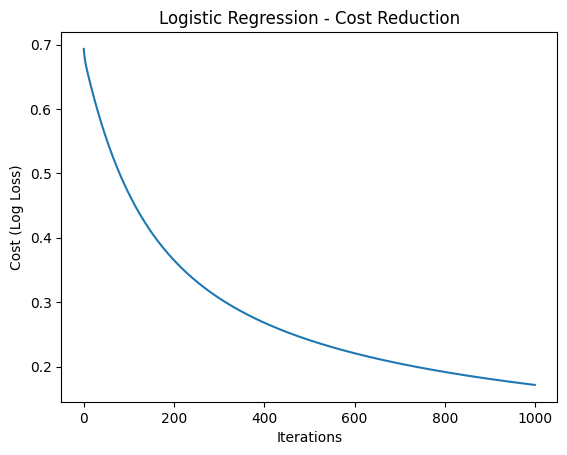

Final w0: -5.956350539118638
Final w1: 1.769045864973106


In [20]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradient_logistic(x,y,w0_init,w1_init,lr,epochs):
    w0=w0_init
    w1=w1_init
    m=len(x)
    cost_history=[]

    for i in range(epochs):
        z=w0+w1*x
        y_pred=sigmoid(z)

        cost=-(1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        dw0=(1/m)*np.sum(y_pred-y)
        dw1=(1/m)*np.sum((y_pred-y)*x)
        w0=w0-lr*dw0
        w1=w1-lr*dw1

        cost_history.append(cost)
        if i % 100==0:
            print('Iterations',i,'cost',cost)

    plt.plot(cost_history)
    plt.title("Logistic Regression - Cost Reduction")
    plt.xlabel("Iterations")
    plt.ylabel("Cost (Log Loss)")
    plt.show()

    return w0,w1
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1])

final_w0, final_w1 = gradient_logistic(x, y, 0, 0, 0.1, 1000)
print("Final w0:", final_w0)
print("Final w1:", final_w1)

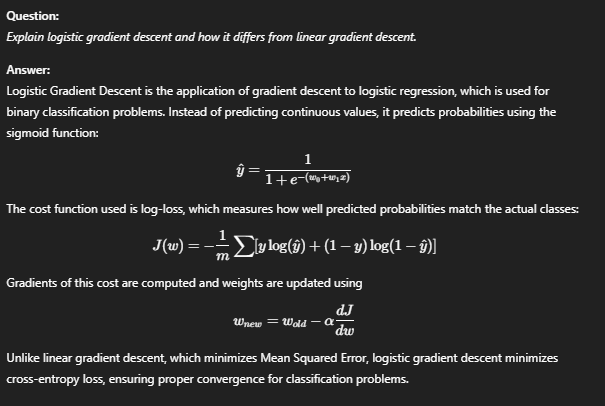

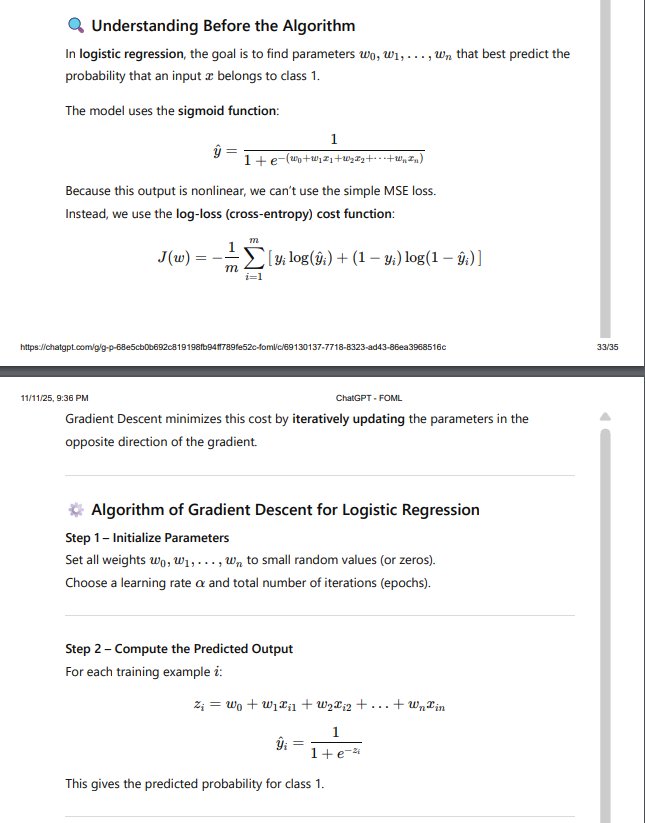

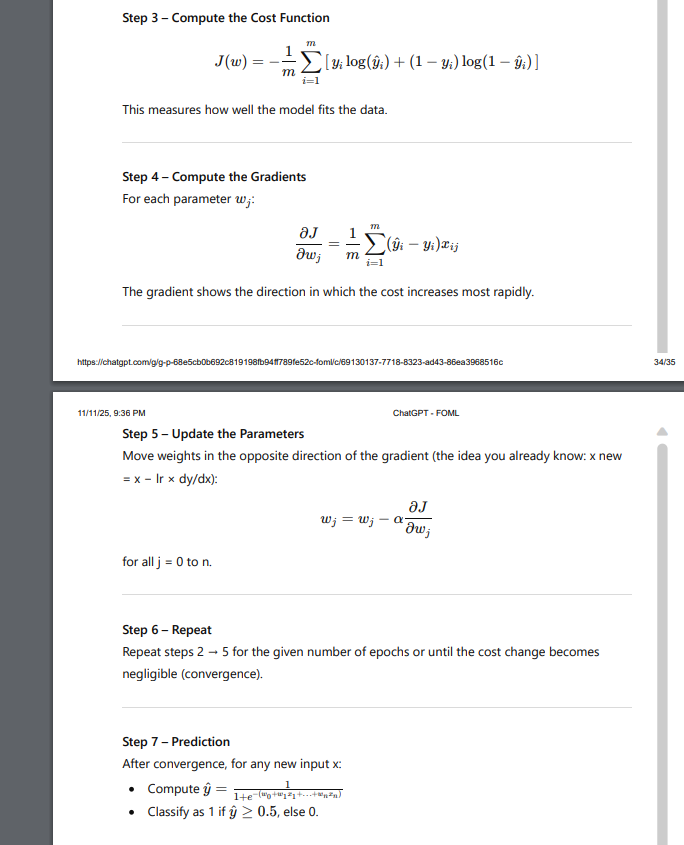

#GRADIENT DESCENT LOGISTIC 10 MARKS QUESTION re exam question
 

| Develop “Logistic Regression Gradient Descent” function using python
| code for the dataset given below.

‘X=[1.2, 3.4, 2.0, 4.5, 1.8, 5.2, 2.3, 3.9, 2.7, 4.1] # Tumour Size (cm3)

| Y = (0, 1, 0, 1, 0, 1, 0, 1, 0, 1] # Tumour Type (0 for benign, 1 for

malignant)


Iterations 0 cost 0.6931471805599454
Iterations 100 cost 0.4724317410899846
Iterations 200 cost 0.37313353576049324
Iterations 300 cost 0.31097515545932986
Iterations 400 cost 0.2688451945993546
Iterations 500 cost 0.2384411643990182
Iterations 600 cost 0.2154226326963202
Iterations 700 cost 0.19734096380335997
Iterations 800 cost 0.1827207298957055
Iterations 900 cost 0.17062284710016407


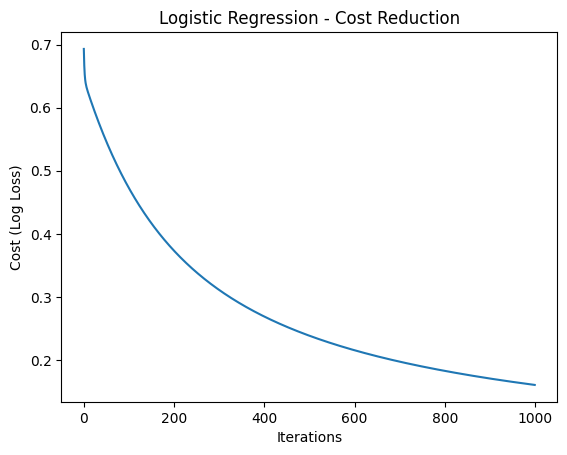

Final w0: -5.919064529687159
Final w1: 2.011096281043114


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradient_logistic(x,y,w0_init,w1_init,lr,epochs):
    w0=w0_init
    w1=w1_init
    m=len(x)
    cost_history=[]

    for i in range(epochs):
        z=w0+w1*x
        #predict values
        y_pred=sigmoid(z)
        #step2:compute cost
        cost=-(1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        #step 3:
        dw0=(1/m)*np.sum(y_pred-y)
        dw1=(1/m)*np.sum((y_pred-y)*x)
        w0=w0-lr*dw0
        w1=w1-lr*dw1

        cost_history.append(cost)
        if i % 100==0:
            print('Iterations',i,'cost',cost)


    plt.plot(cost_history)
    plt.title("Logistic Regression - Cost Reduction")
    plt.xlabel("Iterations")
    plt.ylabel("Cost (Log Loss)")
    plt.show()

    return w0,w1

x=np.array([1.2, 3.4, 2.0, 4.5, 1.8, 5.2, 2.3, 3.9, 2.7, 4.1])
y=np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])


final_w0, final_w1 = gradient_logistic(x, y, 0, 0, 0.1, 1000)
print("Final w0:", final_w0)
print("Final w1:", final_w1)

#Write down the python code for linear regression cost function re exam question 5 marks-

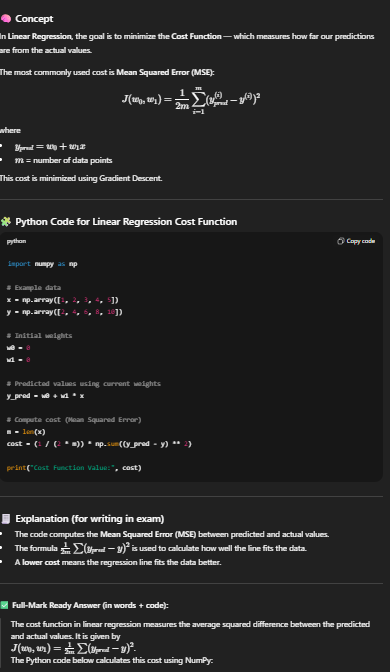

#exam question - 3rd pdf # different type of question - 10 marks question

X = np.array([[0.5, -1.2, 3.3],
              [-0.8, 1.0, -0.5], 
              (2.2, -0.1, 0.0],
              [1.5, 1.2, -1.2]])

y =np.array((I, 0, 1, 0]).

Implement logistic regression using gradient descent on the above data set
to find the best-fitting line for the given above dataset. Write down Python
code in your answer book with following specifications:

e Initialize the parameters to zero.

e Set the learning rate to 0.01.
e Run the gradient descent for 1000 iterations.
Hint:
def LRGQ):
m=
nx =
w=
b= *
cost_hist =[]

for i in range(epoch):

b=
cost_hist.append(cost)

return w,b


Iteration: 0 Cost: 0.6931471805599453
Iteration: 100 Cost: 0.37143415460105067
Iteration: 200 Cost: 0.26465854387917886
Iteration: 300 Cost: 0.20807587930310767
Iteration: 400 Cost: 0.17217231107318856
Iteration: 500 Cost: 0.14713705998539495
Iteration: 600 Cost: 0.12860567690509123
Iteration: 700 Cost: 0.11430154319144072
Iteration: 800 Cost: 0.1029096819404449
Iteration: 900 Cost: 0.09361376979099947


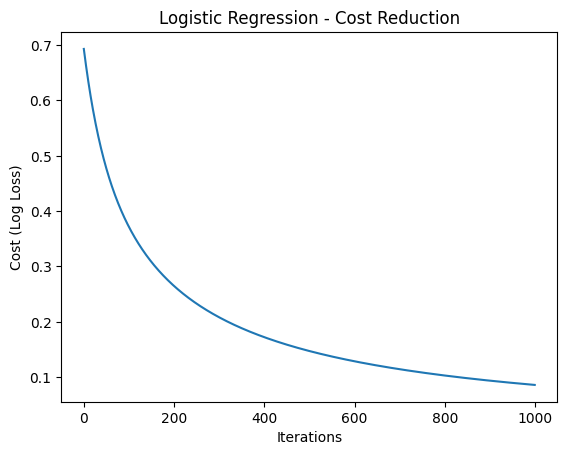

Final weights: [ 0.88052347 -1.26376866  1.25934826]
Final bias: -0.2221961036896429


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_logistic(X, y, lr, epochs):
    m, n = X.shape  # m = number of samples, n = features
    w = np.zeros(n) # initialize weights to zero
    b = 0           # bias term
    cost_history = []

    for i in range(epochs):
        # Step 1: Compute linear combination
        z = np.dot(X, w) + b
        # Step 2: Apply sigmoid activation
        y_pred = sigmoid(z)
        # Step 3: Compute cost (log loss)
        cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        # Step 4: Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        # Step 5: Update parameters
        w = w - lr * dw
        b = b - lr * db
        # Step 6: Store cost for visualization
        cost_history.append(cost)

        if i % 100 == 0:
            print("Iteration:", i, "Cost:", cost)

    plt.plot(cost_history)
    plt.title("Logistic Regression - Cost Reduction")
    plt.xlabel("Iterations")
    plt.ylabel("Cost (Log Loss)")
    plt.show()

    return w, b

# Given dataset
X = np.array([[0.5, -1.2, 3.3],
              [-0.8, 1.0, -0.5],
              [2.2, -0.1, 0.0],
              [1.5, 1.2, -1.2]])

y = np.array([1, 0, 1, 0])

# Run gradient descent
final_w, final_b = gradient_logistic(X, y, lr=0.01, epochs=1000)

print("Final weights:", final_w)
print("Final bias:", final_b)


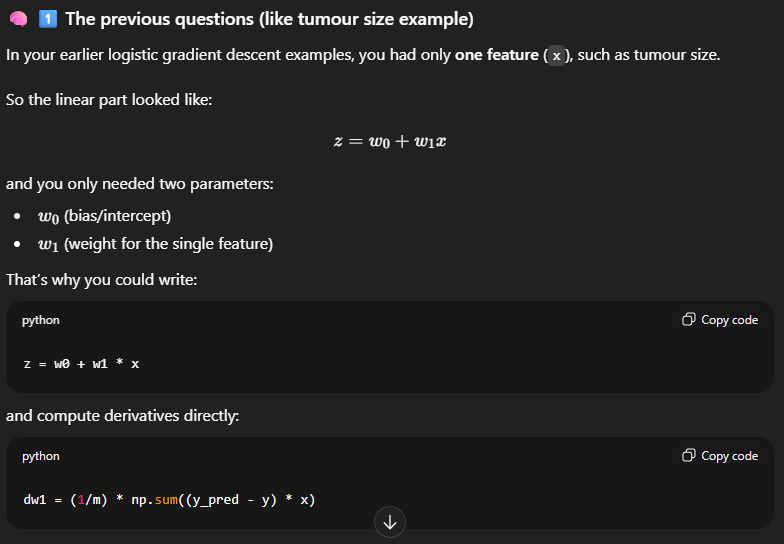

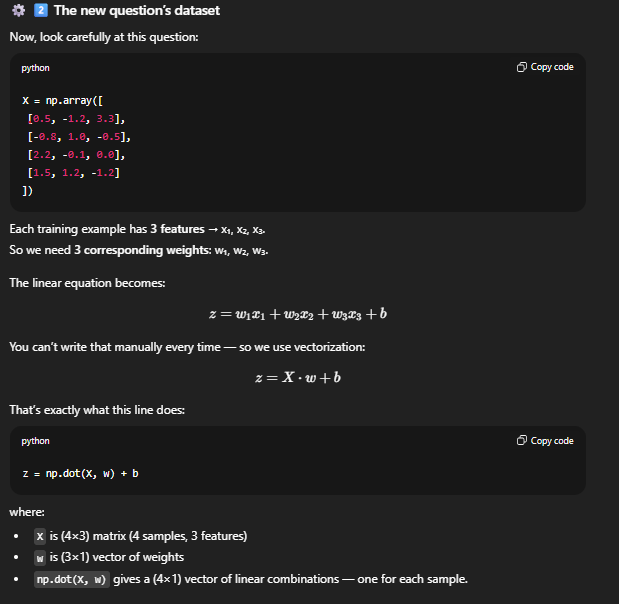

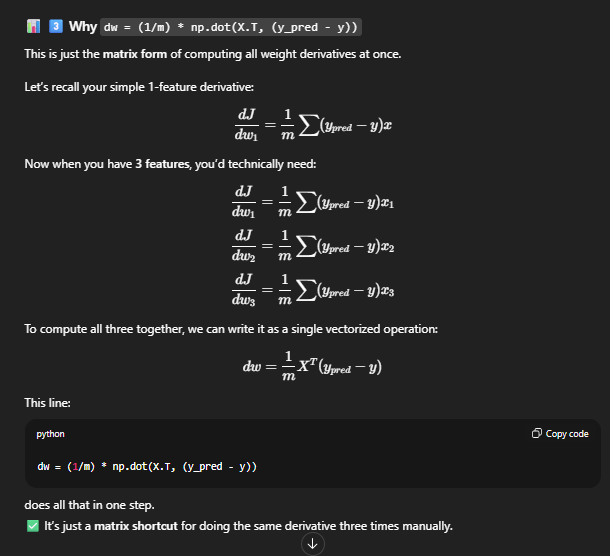

# exam question - 10 marks
Develop “Linear Regression Gradient Descent” function using python
code for the dataset given below.

x = [43,50,48,52,55,68,72] # study hours

y = [45,52,43,57,60,63,70] # Exam Score

Iterations 0 cost 10864.285714285714
Iterations 100 cost 0.29942624278336494
Iterations 200 cost 0.2992418383535104
Iterations 300 cost 0.2990575474908013
Iterations 400 cost 0.2988733701253364
Iterations 500 cost 0.29868930618721884
Iterations 600 cost 0.2985053556065978
Iterations 700 cost 0.2983215183136186
Iterations 800 cost 0.2981377942385492
Iterations 900 cost 0.29795418331167023


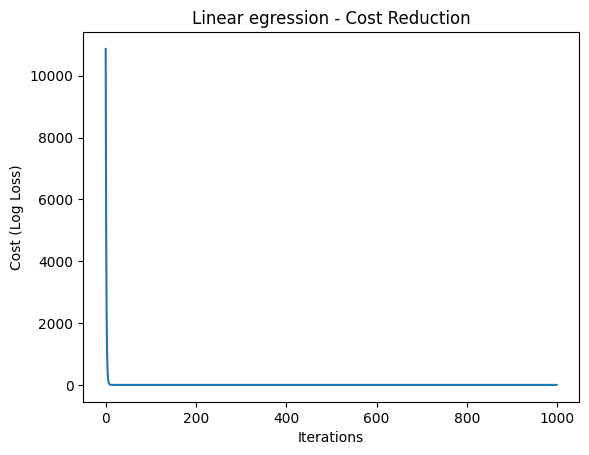

Final weights: 0.04669087763827645
Final bias: 0.9990500063426567


In [35]:

#learning rate changed from 0.1 to 0.0001 because-
import numpy as np
import matplotlib.pyplot as plt

def linear_gradient(x,y,w0_init,w1_init,lr,epochs):
    w0=w0_init
    w1=w1_init
    m=len(x)
    cost_history=[]

    for i in range(epochs):
        y_pred=w0+w1*x
        cost=(1/(2*m)*np.sum(y_pred-y)**2)
        dw0=(1/m)*np.sum(y_pred-y)
        dw1=(1/m)*np.sum((y_pred-y)*x)
        w0=w0-lr*dw0
        w1=w1-lr*dw1
        cost_history.append(cost)

        if i %100==0:
            print('Iterations',i,'cost',cost)
    plt.plot(cost_history)
    plt.title("Linear egression - Cost Reduction")
    plt.xlabel("Iterations")
    plt.ylabel("Cost (Log Loss)")
    plt.show()

    return w0,w1

x = np.array([43,50,48,52,55,68,72]) # study hours

y = np.array([45,52,43,57,60,63,70]) # Exam Score

final_w, final_b = linear_gradient(x, y, 0,0,lr=0.0001, epochs=1000)

print("Final weights:", final_w)
print("Final bias:", final_b)


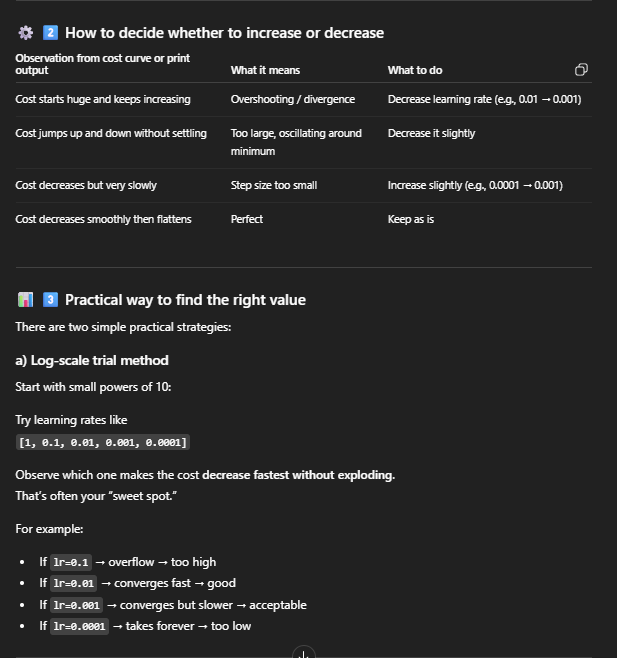

Perfect — this is one of the most common 5-mark theory questions, so here’s your **exam-ready answer**, written in the same clean, structured way professors expect:

---

## 🧠 **Answer: Significance of Hyper-Parameter “Learning Rate” in Gradient Descent**

The **learning rate (α)** is a hyper-parameter that controls the **step size** used when updating model parameters in gradient descent. It determines **how fast or slow** the algorithm moves toward the minimum of the cost function.

[
w_{new} = w_{old} - \alpha \frac{dJ}{dw}
]

---

### **Significance:**

1. **Controls Convergence Speed:**
   A proper learning rate allows the algorithm to reach the minimum efficiently.

   * Too small → very slow convergence.
   * Too large → overshoots the minimum and may diverge.

2. **Prevents Oscillation and Divergence:**
   If α is too high, the parameter updates are too large, causing the cost to oscillate or blow up (overflow).

3. **Ensures Stable Optimization:**
   An appropriate α ensures smooth reduction of the cost function and prevents instability.

4. **Affects Accuracy and Training Time:**

   * Small α → stable but time-consuming training.
   * Optimal α → balance between speed and accuracy.

5. **Requires Tuning:**
   Learning rate is not learned from data; it must be chosen experimentally (e.g., testing 0.1, 0.01, 0.001) or tuned automatically using adaptive optimizers.

---

### **In short:**

> The learning rate determines how quickly or cautiously gradient descent updates the model’s weights. Choosing an optimal value is crucial for fast, stable, and accurate convergence of the algorithm.

---

✅ **Keywords to include for 5 marks:**
“controls step size,” “convergence speed,” “too high diverges,” “too low slow,” “crucial hyper-parameter,” “affects accuracy and stability.”
